In [38]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2
import math
import utils
import imutils


def disp_image(image):
    plt.figure(figsize=(25, 25))
    plt.imshow(image)
    plt.show()

image_arr [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
tl [75 15]
br [3316 2291]
height 3241
width 2276
(0, 232, 6, 11) w:6 h:11
(0, 200, 154, 75) w:154 h:75
(0, 187, 260, 113) w:260 h:113
(0, 107, 260, 79) w:260 h:79
(0, 100, 263, 5) w:263 h:5
(0, 10, 262, 4) w:262 h:4


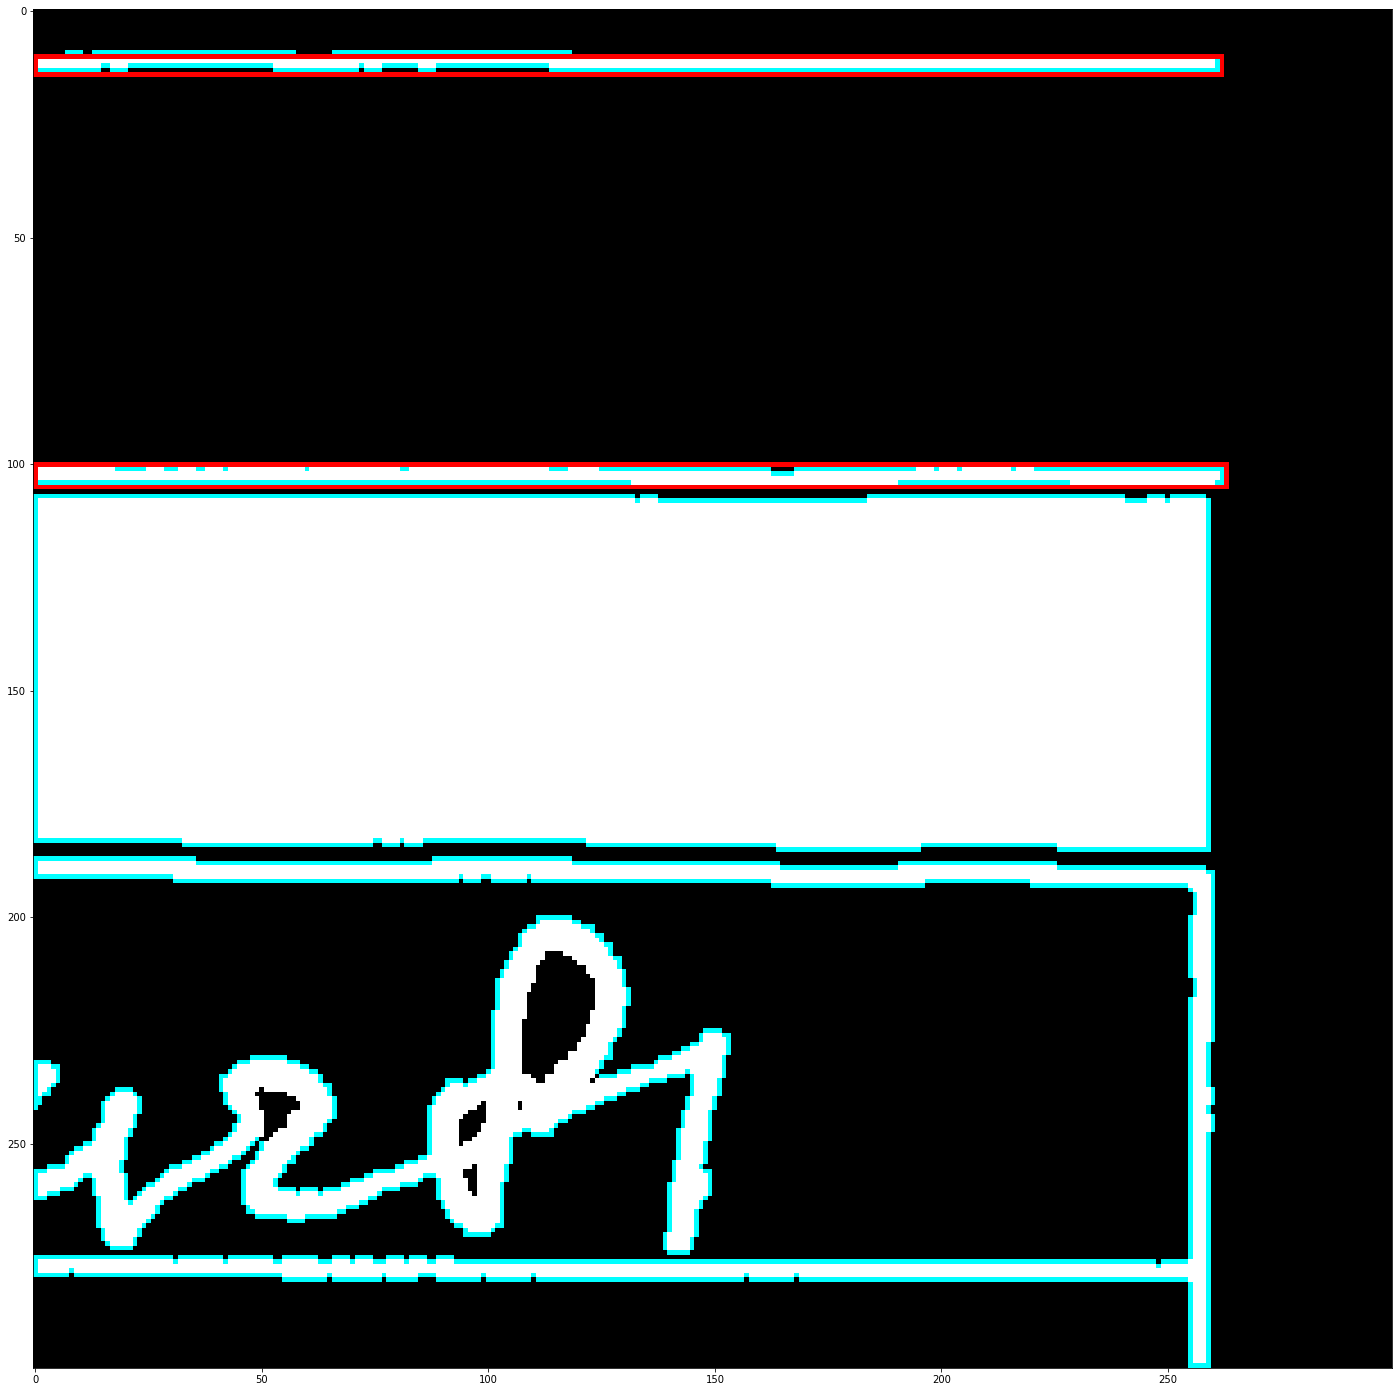

[array([[[  3, 232]],

       [[  0, 242]],

       [[  5, 236]]], dtype=int32), array([[[153, 226]],

       [[125, 235]],

       [[131, 219]],

       [[129, 209]],

       [[123, 202]],

       [[111, 200]],

       [[102, 214]],

       [[101, 233]],

       [[ 91, 236]],

       [[ 86, 253]],

       [[ 54, 260]],

       [[ 66, 240]],

       [[ 62, 234]],

       [[ 48, 231]],

       [[ 41, 235]],

       [[ 44, 247]],

       [[ 21, 263]],

       [[ 21, 238]],

       [[ 12, 250]],

       [[  0, 256]],

       [[  0, 262]],

       [[ 12, 257]],

       [[ 15, 271]],

       [[ 21, 273]],

       [[ 29, 262]],

       [[ 49, 249]],

       [[ 49, 266]],

       [[ 66, 266]],

       [[ 88, 257]],

       [[ 91, 266]],

       [[100, 270]],

       [[106, 248]],

       [[144, 234]],

       [[139, 270]],

       [[144, 274]]], dtype=int32), array([[[  0, 187]],

       [[  0, 191]],

       [[254, 193]],

       [[254, 276]],

       [[  0, 275]],

       [[  0, 279]],

   

In [106]:
orig = cv2.imread("/home/dan/Downloads/poulespng/poule-7.pdf.png", cv2.IMREAD_UNCHANGED)
tmpl = cv2.imread("./data/pngs/poule-front-content-tmpl.png", cv2.IMREAD_UNCHANGED)

blur_amount = (13, 13)
crop_margin_px = 80

debug = True

# Crop inward, there won't be anything at the edges except for scanning artifacts
orig = orig[crop_margin_px:-crop_margin_px, crop_margin_px:-crop_margin_px]

img_gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
thresh = cv2.GaussianBlur(thresh, blur_amount, 0)
th, thresh = cv2.threshold(img_gray, 254, 255, cv2.THRESH_BINARY)
thresh = cv2.erode(thresh, None, iterations=1)


corner_crop_px = 300

thresh = utils.crop_to_content(255 - thresh)

tl = thresh[
    0:corner_crop_px, 
    0:corner_crop_px
]
bl = thresh[
    thresh.shape[0] - corner_crop_px:thresh.shape[0],
    0:corner_crop_px
]
tr = thresh[
    0:corner_crop_px, 
    thresh.shape[1] - corner_crop_px:thresh.shape[1]
]
br = thresh[
    thresh.shape[0] - corner_crop_px:thresh.shape[0],
    thresh.shape[1] - corner_crop_px:thresh.shape[1]
]

def findCoords(corner_image):
    copy = corner_image.copy()
    # these are coords yay!
    cnts = cv2.findContours(copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    copy = cv2.cvtColor(copy, cv2.COLOR_BGR2RGB)
    cv2.drawContours(copy, cnts, -1, (0, 255, 255), 1)
    areas = [cv2.contourArea(c) for c in cnts]
#     areas = [a for a in areas if a > 200.0 and a < 2000.0]
    polys = [cv2.approxPolyDP(c, 3, True) for c in cnts]
    rects = [cv2.boundingRect(p) for p in polys]
    
    for r in rects:
        x, y, w, h = r
        
        print(f"{r} w:{w} h:{h}")
        if abs(h) > 20: continue
        if abs(w) < 100: continue
            
        cv2.rectangle(copy, (x, y), (x + w, y + h), (255, 0, 0), 1)
        
        
    disp_image(copy)
    
    print(polys)
    

    
    
findCoords(tr)
    
# TODO now find most extreme pixels
# The location that we return should remap onto the original image
# So tl = found extreme corner = tl_xc.y + any_offset coming from other cropping
# Or we just don't care:
# - Crop naive to strip artifacts
# - Crom to content
# - Find corners
# - hindHomography()
# - persectiveWarp()
# - Resize
# - ...
# - Profit